# Œuiüealæ

In [4]:
import numpy as np

In [5]:
#Matplotlib configuration
from matplotlib import pyplot as plt

#A4 tufte layout paper figure sizes
MARGIN_FIG = lambda scale: (1.99, 1.99*scale)
MAIN_FIG = lambda scale: (4.18, 4.18*scale)
FULL_FIG = lambda scale: (6.64, 6.64*scale)

#Fontsize configuration
SMALL_SIZE = 8
MEDIUM_SIZE = 10
BIGGER_SIZE = 12

plt.rc('font', family='Fira Code')
plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title


#Other matplotlib configuration
plt.rcParams['figure.dpi'] = 100
plt.rcParams['figure.autolayout'] = True
plt.rcParams['savefig.dpi'] = 300
plt.rcParams['lines.linewidth'] = 1
plt.rcParams['axes.linewidth'] = 1
plt.rcParams["savefig.bbox"] = 'tight'
plt.rcParams['mathtext.fontset'] = 'custom'
plt.rcParams['mathtext.rm'] = 'Fira Code'
plt.rcParams['mathtext.it'] = 'Fira Code'
plt.ioff()

In [6]:
hii = np.genfromtxt('../tmp/hii_distr.csv', delimiter=',')
pne = np.genfromtxt('../tmp/pne_distr.csv', delimiter=',')
snr = np.genfromtxt('../tmp/snr_distr.csv', delimiter=',')
tot = np.concatenate([hii, pne, snr])

N_hii = len(hii)
N_snr = 3500
N_pne = 6600

In [7]:
bins = np.logspace(0, np.log10(np.max(tot)), 100)
print(bins)

def bin(x, N):
  n, _ = np.histogram(x, bins=bins)
  n = N*n / np.sum(n)
  #assert(N == round(np.sum(n)))
  return n

hii_binned = bin(hii, N_hii)
pne_binned = bin(pne, N_pne)
snr_binned = bin(snr, N_snr)

print(bins.shape, hii_binned.shape, pne_binned.shape)

[  1.           1.06050375   1.1246682    1.19271484   1.26487856
   1.34140846   1.4225687    1.50863944   1.59991778   1.6967188
   1.79937665   1.90824568   2.0237017    2.14614324   2.27599295
   2.41369906   2.5597369    2.71461058   2.87885469   3.0530362
   3.23775633   3.43365273   3.64140159   3.86172003   4.09536857
   4.34315373   4.60593081   4.88460689   5.18014392   5.49356204
   5.82594314   6.17843454   6.55225299   6.94868886   7.36911059
   7.8149694    8.28780435   8.78924758   9.32103001   9.88498727
  10.48306605  11.11733085  11.78997104  12.50330849  13.25980552
  14.06207347  14.91288163  15.81516687  16.77204376  17.78681528
  18.86298428  20.00426554  21.2145986   22.49816135  23.85938445
  25.30296665  26.83389099  28.45744199  30.17922391  32.0051801
  33.94161347  35.99520833  38.17305337  40.4826662   42.93201927
  45.52956738  48.28427689  51.20565665  54.30379084  57.58937376
  61.07374676  64.76893739  68.68770091  72.84356432  77.25087303
  81.92484045

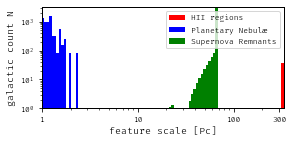

In [8]:
plt.figure(figsize=MAIN_FIG(0.5))
width = abs(bins[:-1] - bins[1:])
plt.bar(bins[:-1], hii_binned, label='HII regions', color='r', align='edge', width=width)
plt.bar(bins[:-1], pne_binned, label='Planetary Nebulæ', color='b', align='edge', width=width, bottom=snr_binned)
plt.bar(bins[:-1], snr_binned, label='Supernova Remnants', color='g', align='edge', width=width)
plt.yscale('log')
plt.xscale('log')
plt.xticks([1, 10, 100, 300], labels=['1', '10', '100', '300'])
plt.ylim(bottom=1)
plt.xlim(np.min(bins), np.max(bins))
plt.xlabel('feature scale [Pc]')
plt.ylabel('galactic count N')
plt.legend()

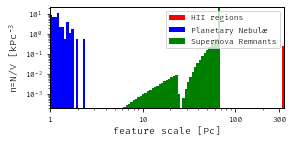

In [9]:
V=141.371669412
hii_binned = bin(hii, N_hii/V)
pne_binned = bin(pne, N_pne/V)
snr_binned = bin(snr, N_snr/V)

plt.figure(figsize=MAIN_FIG(0.5))
width = abs(bins[:-1] - bins[1:])
plt.bar(bins[:-1], hii_binned, label='HII regions', color='r', align='edge', width=width)
plt.bar(bins[:-1], pne_binned, label='Planetary Nebulæ', color='b', align='edge', width=width, bottom=snr_binned)
plt.bar(bins[:-1], snr_binned, label='Supernova Remnants', color='g', align='edge', width=width)
plt.yscale('log')
plt.xscale('log')
plt.xticks([1, 10, 100, 300], labels=['1', '10', '100', '300'])
plt.xlim(np.min(bins), np.max(bins))
plt.xlabel('feature scale [Pc]')
plt.ylabel('n=N/V [$kPc^{-3}$')
plt.legend()
plt.savefig('../figs/combi_histo.pdf', transparent=True, bbox_inches="tight", pad_inches=0.05)

In [10]:
# save feature scales
distr = np.array([bins[:-1], hii_binned+pne_binned+snr_binned]).transpose()
np.savetxt('../tmp/full_distr.csv', distr, delimiter=',')